# Analyse par composantes principales

Inspir√© de [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) par Jake VanderPlas


Jusqu'√† pr√©sent, nous avons √©tudi√© de mani√®re approfondie les estimateurs d'apprentissage supervis√©: ces estimateurs qui pr√©disent des √©tiquettes en fonction de donn√©es d'apprentissage √©tiquet√©es.
Nous commen√ßons ici √† examiner plusieurs estimateurs non supervis√©s, qui peuvent mettre en √©vidence des aspects int√©ressants des donn√©es sans faire r√©f√©rence √† des √©tiquettes connues.

Dans cette section, nous explorons l‚Äôun des algorithmes non supervis√©s les plus largement utilis√©s, l‚Äôanalyse en composantes principales (ACP/PCA).
PCA est  un algorithme de r√©duction de dimensionnalit√©, mais il peut √©galement √™tre utile en tant qu'outil de visualisation, de filtrage du bruit, d'extraction de caract√©ristiques, et bien plus encore.

Nous commen√ßons par les importations standard:

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## PCA
L‚Äôanalyse en composantes principales est une m√©thode rapide et flexible non supervis√©e pour la r√©duction de la dimensionnalit√© des donn√©e. Son comportement est le plus facile √† visualiser en consultant un jeu de donn√©es bidimensionnel.
Consid√©rez les 200 points suivants:

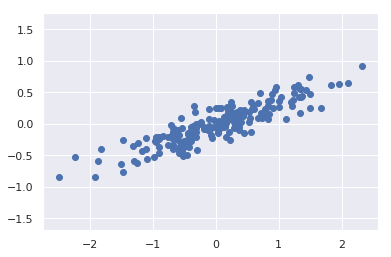

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

# √Ä l‚Äô≈ìil, il est clair qu‚Äôil existe une relation presque lin√©aire entre les variables x et y.
Cela rappelle les donn√©es de r√©gression lin√©aire que nous avons explor√©es dans, mais le probl√®me pos√© ici est l√©g√®rement diff√©rent: plut√¥t que d'essayer de *pr√©voir* les valeurs y √† partir de x valeurs, le probl√®me d‚Äôapprentissage non supervis√© tente d‚Äôen savoir plus sur la *relation* entre les valeurs x et y.

Dans l'analyse en composantes principales, cette relation est quantifi√©e en recherchant une liste des *axes principaux* dans les donn√©es et en utilisant ces axes pour d√©crire l'ensemble de donn√©es.
En utilisant l‚Äôestimateur `` PCA`` de Scikit-Learn, nous pouvons calculer ceci comme suit:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

L'ajustement apprend certaines quantit√©s √† partir des donn√©es, principalement les "composants" et la "variance expliqu√©e":

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Pour voir ce que signifient ces nombres, visualisons-les sous forme de vecteurs sur les donn√©es d'entr√©e, en utilisant les "composants" pour d√©finir la direction du vecteur et la "variance expliqu√©e" pour d√©finir la longueur au carr√© du vecteur:

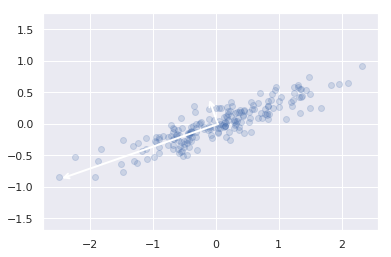

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Ces vecteurs repr√©sentent les axes principaux  des donn√©es et la longueur du vecteur indique √† quel point cet axe est "important" dans la description de la distribution des donn√©es. Plus pr√©cis√©ment, il s'agit d'une mesure de la variance des donn√©es lorsqu'elles sont projet√©es. sur cet axe. La projection de chaque point de donn√©es sur les axes principaux sont les "composantes principales" des donn√©es.
Si nous tra√ßons ces composants principaux √† c√¥t√© des donn√©es d'origine, nous voyons les trac√©s pr√©sent√©s ici:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)

Cette transformation des axes de donn√©es en axes principaux est une * transformation affine *, ce qui signifie fondamentalement qu'elle est compos√©e d'une translation, d'une rotation et d'une mise √† l'√©chelle uniforme.

Bien que cet algorithme permettant de trouver les composants principaux puisse sembler √™tre une simple curiosit√© math√©matique, il s‚Äôav√®re avoir des applications tr√®s √©tendues dans le monde de l‚Äôapprentissage automatique et de l‚Äôexploration de donn√©es.


### PCA et r√©duction de la dimensionnalit√©

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

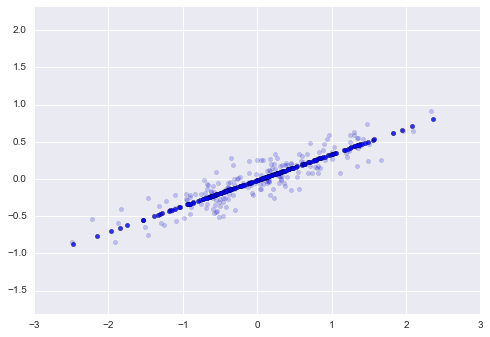

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### PCA for visualization: Hand-written digits

L'utilit√© de la r√©duction de dimensionnalit√© peut ne pas √™tre enti√®rement √©vidente dans deux dimensions seulement, mais devient beaucoup plus claire lorsque l'on examine des donn√©es de grande dimension.
Pour voir cela, jetons un coup d'≈ìil √† l'application de la PCA aux donn√©es de chiffre, de type MNIST

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Ces donn√©es sont constitu√©es d'images 8 √ó 8 pixels, ce qui signifie qu'elles sont √† 64 dimensions.
Pour acqu√©rir une certaine intuition dans les relations entre ces points, nous pouvons utiliser PCA pour les projeter dans un nombre de dimensions plus g√©rable, par exemple deux:

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Nous pouvons maintenant tracer les deux premi√®res composantes principales de chaque point pour en savoir plus sur les donn√©es:

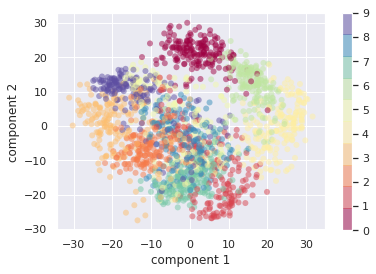

In [12]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Rappelez ce que ces composants signifient: les donn√©es compl√®tes sont un nuage de points de 64 dimensions, et ces points sont la projection de chaque point de donn√©es le long des directions pr√©sentant la variance la plus grande.
Pour l'essentiel, nous avons trouv√© l'√©tirement et la rotation optimaux dans un espace √† 64 dimensions qui nous permet de voir la disposition des chiffres en deux dimensions, et ce, de mani√®re non supervis√©e, c'est-√†-dire sans r√©f√©rence aux √©tiquettes.

## Choisir le nombre de composants

Un √©l√©ment essentiel de l‚Äôutilisation pratique de la PCA est la capacit√© d‚Äôestimer le nombre de composants n√©cessaires √† la description des donn√©es.
Ceci peut √™tre d√©termin√© en regardant le ratio de variance expliqu√©e *cumul√©e* en fonction du nombre de composantes:

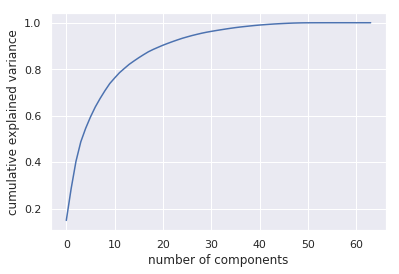

In [13]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Cette courbe quantifie la part de la variance totale √† 64 dimensions contenue dans les premi√®res composantes ùëÅ. Par exemple, nous voyons qu'avec les chiffres, les 10 premiers composants contiennent environ 75% de la variance, alors qu'il vous faut environ 50 composants pour d√©crire pr√®s de 100% de la variance.
Nous voyons ici que notre projection bidimensionnelle perd beaucoup d'informations (mesur√©es par la variance expliqu√©e) et qu'il nous faudrait environ 20 composants pour conserver 90% de la variance. L'examen de ce graphique pour rechercher un jeu de donn√©es de grande dimension peut vous aider √† comprendre le niveau de redondance pr√©sent dans plusieurs observations.

## PCA comme filtrage du bruit

La PCA peut √©galement servir d‚Äôapproche de filtrage des donn√©es bruit√©es.
L'id√©e est la suivante: les composants dont la variance varie beaucoup plus que l'effet du bruit doivent √™tre relativement peu affect√©s par le bruit.
Donc, si vous reconstruisez les donn√©es en utilisant uniquement le plus grand sous-ensemble de composants principaux, vous devriez pr√©f√©rer conserver le signal et √©liminer le bruit.

Voyons √† quoi cela ressemble avec les chiffres.
Commen√ßons par tracer plusieurs donn√©es d'entr√©e sans bruit:

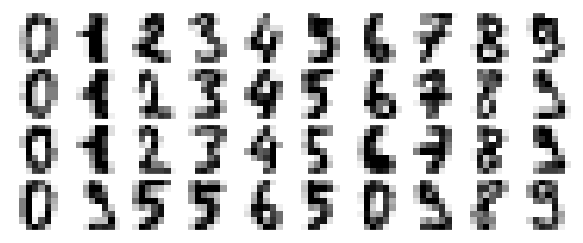

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ajoutons maintenant du bruit al√©atoire pour cr√©er un jeu de donn√©es bruyant et re-tracez-le:

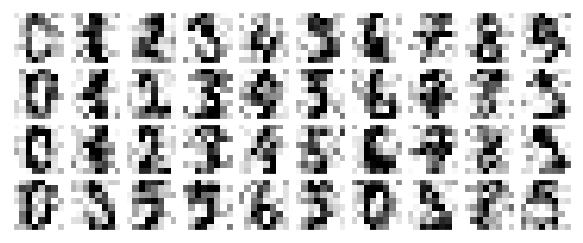

In [15]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Il est clair √† l'≈ìil que les images sont bruyantes et contiennent des pixels parasites.
Formons un PCA sur les donn√©es bruit√©es en demandant √† la projection de pr√©server 50% de la variance:

In [16]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Ici, 50% de la variance correspond √† 12 composantes principales.
Maintenant, nous calculons ces composants, puis utilisons l'inverse de la transformation pour reconstruire les chiffres filtr√©s:

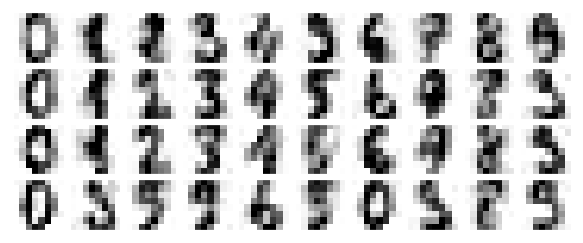

In [17]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Cette propri√©t√© de pr√©servation du signal / filtrage du bruit fait de la PCA une routine de s√©lection de fonctionnalit√©s tr√®s utile. Par exemple, au lieu de former un classifieur sur des donn√©es de tr√®s grande dimension, vous pouvez plut√¥t former le classifieur sur la repr√©sentation de plus petite dimension, qui servira automatiquement √† filtrer sur le bruit al√©atoire dans les entr√©es.